<a href="https://colab.research.google.com/github/Faizal1234567/Machine-Learning/blob/main/Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# multivariate using real time dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
student_lifestyle = pd.read_csv('/content/student_lifestyle_dataset.csv')
print(student_lifestyle.columns)

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


In [ ]:
student_lifestyle.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
student_lifestyle.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [ ]:
student_lifestyle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [ ]:
student_lifestyle.duplicated().sum()

0

In [ ]:
student_lifestyle.drop_duplicates()
print(student_lifestyle)

      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1                     8.0        

In [ ]:
student_lifestyle.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [ ]:
features = ['Student_ID', 'Study_Hours_Per_Day','Extracurricular_Hours_Per_Day','GPA']
X = student_lifestyle[features].values  # Access columns using the list
y = student_lifestyle['Stress_Level'].values  # Replace 'Target_Variable' with the actual target column name, in this example, we're assuming 'Stress_Level' is the target

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize parameters
a0, a1, a2, a3, a4 = 0, 0, 0, 0, 0
a0_values, a1_values, a2_values, a3_values, a4_values = [], [], [], [], []  # Initialize lists to store parameter values
alpha = 0.01
m = len(y_train)

# Function to compute predictions
def predict(X):
    return a0 + a1 * X[:, 0] + a2 * X[:, 1] + a3 * X[:, 2] + a4 * X[:,3]


# Function to compute mean squared error
def compute_mse(y_pred, y_true):
    return (1/(2*m)) * np.sum((y_pred - y_true) ** 2)


In [ ]:
# Gradient descent loop
for iteration in range(100):  # Number of iterations
    y_pred = predict(X_train)
    mse = compute_mse(y_pred, y_train)
    # Calculate gradients
    da0 = (1/m) * np.sum(y_pred - y_train)
    da1 = (1/m) * np.sum(X_train[:, 0] * (y_pred - y_train))
    da2 = (1/m) * np.sum(X_train[:, 1] * (y_pred - y_train))
    da3 = (1/m) * np.sum(X_train[:, 2] * (y_pred - y_train))
    da4 = (1/m) * np.sum(X_train[:, 3] * (y_pred - y_train))
    # Update parameters
    a0 -= alpha * da0
    a1 -= alpha * da1
    a2 -= alpha * da2
    a3 -= alpha * da3
    a4 -= alpha * da4
    #append values for a0, a1, a2, a3, a4
    a0_values.append(a0)
    a1_values.append(a1)
    a2_values.append(a2)
    a3_values.append(a3)
    a4_values.append(a4)
if iteration % 100 == 0:
        print(f"Iteration {iteration}: MSE = {mse}")

print(f"Final coefficients: a0 = {a0}, a1 = {a1}, a2 = {a2}, a3 = {a3}, a4 ={a4}")

Final coefficients: a0 = 0.7604240778757977, a1 = 0.06028880357348962, a2 = -0.30721466295475086, a3 = -0.0033721461026760794, a4 =-0.1475281314918372


In [ ]:
print(a0_values)
print(a1_values)
print(a2_values)
print(a3_values)
print(a4_values)

[0.008275000000000001, 0.016467250000000003, 0.024577577500000006, 0.03260680172500001, 0.04055573370775001, 0.048425176370672514, 0.05621592460696579, 0.06392876536089613, 0.07156447770728717, 0.07912383293021431, 0.08660759460091218, 0.09401651865490306, 0.10135135346835403, 0.10861283993367049, 0.11580171153433379, 0.12291869441899045, 0.12996450747480054, 0.13693986240005254, 0.14384546377605203, 0.15068200913829152, 0.1574501890469086, 0.16415068715643952, 0.17078418028487513, 0.1773513384820264, 0.18385282509720613, 0.19028929684623408, 0.19666140387777176, 0.20296978983899405, 0.20921509194060411, 0.21539794102119808, 0.2215189616109861, 0.22757877199487625, 0.23357798427492749, 0.23951720443217822, 0.24539703238785646, 0.2512180620639779, 0.25698088144333814, 0.26268607262890475, 0.2683342119026157, 0.27392586978358957, 0.2794616110857537, 0.28494199497489614, 0.2903675750251472, 0.2957388992748958, 0.3010565102821468, 0.30632094517932534, 0.3115327357275321, 0.3166924083702568

Text(0.5, 1.0, 'Convergence of a0')

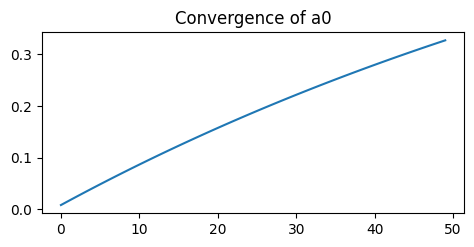

In [ ]:
# Plotting the convergence of parameters
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(a0_values)
plt.title('Convergence of a0')



Text(0.5, 1.0, 'Convergence of a1')

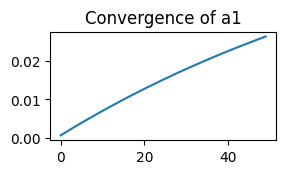

In [ ]:
plt.subplot(3, 2, 2)
plt.plot(a1_values)
plt.title('Convergence of a1')


Text(0.5, 1.0, 'Convergence of a2')

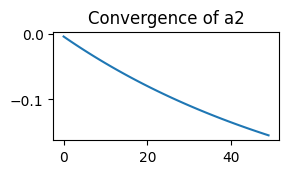

In [ ]:
plt.subplot(3, 2, 3)
plt.plot(a2_values)
plt.title('Convergence of a2')


Text(0.5, 1.0, 'Convergence of a3')

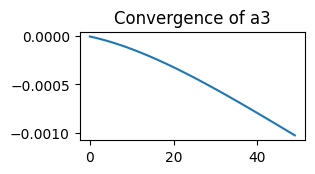

In [ ]:
plt.subplot(3, 2, 4)
plt.plot(a3_values)
plt.title('Convergence of a3')

Text(0.5, 1.0, 'Convergence of a4')

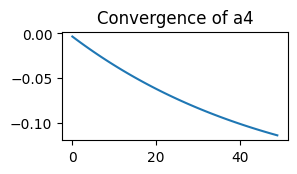

In [ ]:
plt.subplot(3, 2, 5)
plt.plot(a4_values)
plt.title('Convergence of a4')


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>